<a href="https://colab.research.google.com/github/jamshaid2610/analysis-jcl/blob/main/Bowling%20Scorecard/Analysis/Bowling_Performance_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Bowler Performance Metrics.csv')
scaled_df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/EDA/Bowling Performance Metrics (Scaled).csv')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

cumulative_variance

array([0.3433008 , 0.54271474, 0.72324614, 0.81697947, 0.88759325,
       0.95502848, 0.99767053, 0.99948898, 1.        ])

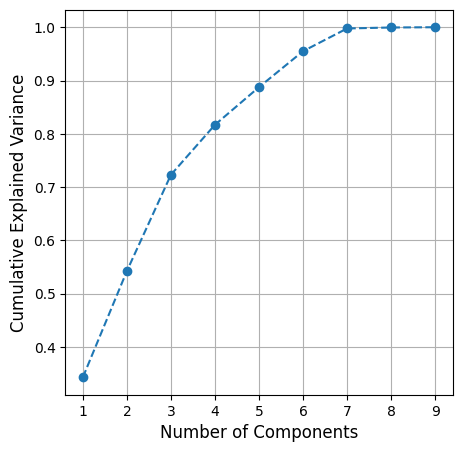

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance Explained')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
# plt.title('Cumulative Explained Variance by PCs', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# def biplot(pca, components=[0, 1]):
#     x_vector = pca.components_[components[0]]
#     y_vector = pca.components_[components[1]]

#     xs = pca_data[:, components[0]]
#     ys = pca_data[:, components[1]]

#     plt.figure(figsize=(20, 10))
#     plt.scatter(xs, ys, alpha=0.5)

#     for i in range(len(x_vector)):
#         plt.arrow(0, 0, x_vector[i] * max(xs), y_vector[i] * max(ys),
#                   color='r', alpha=0.5)
#         plt.text(x_vector[i] * max(xs) * 1.15, y_vector[i] * max(ys) * 1.15,
#                  list(scaled_df.columns.values)[i], color='r', ha='center', va='center')

#     plt.xlabel(f"Principal Component {components[0] + 1}")
#     plt.ylabel(f"Principal Component {components[1] + 1}")
#     plt.title("PCA Biplot")
#     plt.grid(True)
#     plt.show()

# biplot(pca, components=[0, 1])
# biplot(pca, components=[2, 3])
# biplot(pca, components=[1,3])

loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4'], index=scaled_df.columns)



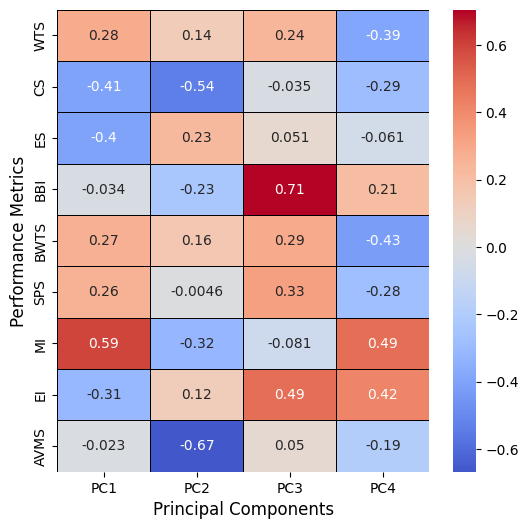

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)

plt.figure(figsize=(6,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
# plt.title('Loadings Heatmap', fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

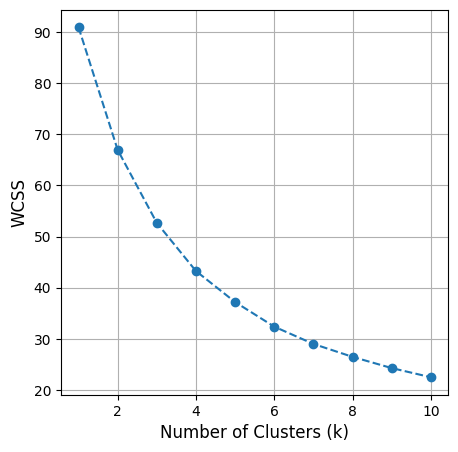

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2','PC3','PC4'])

wcss = []
k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(pca_df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
# plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

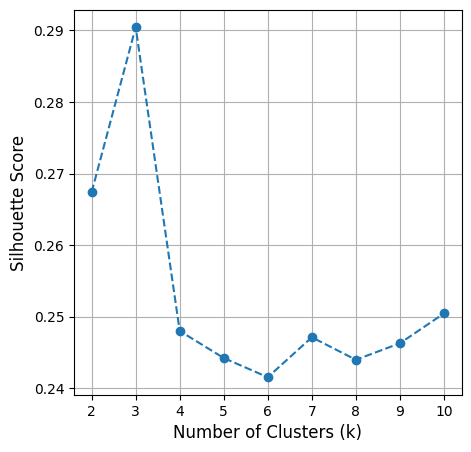

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in k_values[1:]:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(pca_df)
  score = silhouette_score(pca_df, kmeans.labels_)
  sil_scores.append(score)

plt.figure(figsize=(5,5))
plt.plot(k_values[1:], sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
# plt.title('Silhouette Score for Optimal Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = k_values[1:][np.argmax(sil_scores)]
optimal_k

3

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

df['KCluster'] = clusters
scaled_df['KCluster'] = clusters
pca_df['KCluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


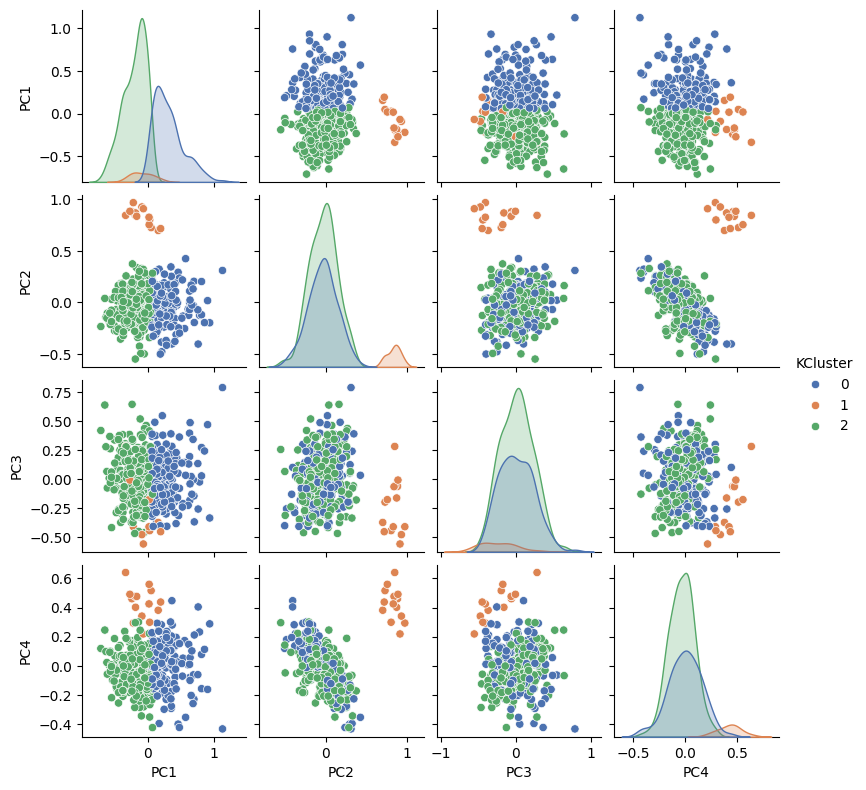

In [ ]:
sns.pairplot(pca_df, hue='KCluster', diag_kind='kde', palette='deep', height=2, aspect=1)
# plt.suptitle('KMeans Clustering for Principal Components', fontsize=14, y=1.02)
plt.show()


In [ ]:
kcluster_means_summary = scaled_df.groupby('KCluster').mean()
kcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/KMeans Cluster Summary.csv')
kcluster_means_summary

,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
KCluster,,,,,,,,,
0,0.321317,0.472083,0.427108,0.532284,0.163590,0.392924,0.449479,0.201132,0.691258
1,0.000000,0.000000,0.727483,0.412871,0.000000,0.000000,0.107816,0.341241,0.000000
2,0.191914,0.684071,0.634711,0.543546,0.033959,0.279162,0.124969,0.349496,0.704510


In [ ]:
kcluster_descriptive = scaled_df.groupby('KCluster').describe()
kcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/KMeans Cluster Descriptive.csv')
kcluster_descriptive

WTS                                                              \
          count      mean       std       min       25%       50%       75%   
KCluster                                                                      
0         151.0  0.321317  0.141705  0.055811  0.209922  0.309493  0.396823   
1          15.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2         224.0  0.191914  0.094763  0.042271  0.103590  0.192743  0.253938   

                       CS            ...        EI             AVMS            \
               max  count      mean  ...       75%       max  count      mean   
KCluster                             ...                                        
0         1.000000  151.0  0.472083  ...  0.301030  0.535117  151.0  0.691258   
1         0.000000   15.0  0.000000  ...  0.501240  0.778151   15.0  0.000000   
2         0.449658  224.0  0.684071  ...  0.477121  1.000000  224.0  0.704510   

                                                                      
               std       min       25%       50%       75%       max  
KCluster                                                              
0         0.095083  0.471378  0.623597  0.687427  0.746780  0.980398  
1         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2         0.103944  0.440624  0.634049  0.702418  0.776164  1.000000  

[3 rows x 72 columns]

In [ ]:
weights = {
    'WTS': 1,
    'CS': 1,
    'ES': 1,
    'BBI': 1,
    'BWTS': 1,
    'SPS': 1,
    'EI': 1,
    'MI': 1,
    'AVMS': 1,
}

cluster_0_data = scaled_df[clusters==0].copy()
cluster_0_data['Composite Score'] = (
    cluster_0_data['BBI'] * weights['BBI'] +
    cluster_0_data['WTS'] * weights['WTS'] +
    cluster_0_data['CS'] * weights['CS'] +
    cluster_0_data['EI'] * weights['EI'] +
    cluster_0_data['MI'] * weights['MI'] +
    cluster_0_data['BWTS'] * weights['BWTS'] +
    cluster_0_data['SPS'] * weights['SPS'] +
    cluster_0_data['ES'] * weights['ES'] +
    cluster_0_data['AVMS'] * weights['AVMS']
)

cluster_0_data['Bowler'] = df[clusters==0]['Bowler'].values
cluster_0_data['Team'] = df[clusters==0]['Team'].values

ranked_kcluster = cluster_0_data[['Bowler', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)
ranked_kcluster

,Bowler,Team,Composite Score
41,C Bennett,Littletown CC Under 13,5.864507
126,Hannah McNally,Leadgate CC Under 13,4.945510
213,Keiran Stafford,Hylton CCC Under 13,4.897610
25,Athena Elstob,Seaham Harbour CC Under 13 Purple,4.674263
336,Sam Raine,Murton CC Under 13,4.528458
...,...,...,...
233,Lily Burrell,Hetton Lyons CC Under 13 Gold,2.859701
201,Joseph McAllister,Hunwick CC Under 13,2.831020
342,Sebastian Gregg,"Marsden CC, Tyne & Wear Under 13",2.715709
272,Max Mullarky,Bishop Auckland CC Under 13,2.689531


In [ ]:
ranked_kcluster['Rank'] = range(1, len(ranked_kcluster) + 1)
ranked_kcluster = ranked_kcluster[['Rank', 'Bowler', 'Team', 'Composite Score']]
ranked_kcluster

,Rank,Bowler,Team,Composite Score
41,1,C Bennett,Littletown CC Under 13,5.864507
126,2,Hannah McNally,Leadgate CC Under 13,4.945510
213,3,Keiran Stafford,Hylton CCC Under 13,4.897610
25,4,Athena Elstob,Seaham Harbour CC Under 13 Purple,4.674263
336,5,Sam Raine,Murton CC Under 13,4.528458
...,...,...,...,...
233,147,Lily Burrell,Hetton Lyons CC Under 13 Gold,2.859701
201,148,Joseph McAllister,Hunwick CC Under 13,2.831020
342,149,Sebastian Gregg,"Marsden CC, Tyne & Wear Under 13",2.715709
272,150,Max Mullarky,Bishop Auckland CC Under 13,2.689531


In [ ]:
ranked_kcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Bowler Rankning KMeans (PCA).csv', index=False)

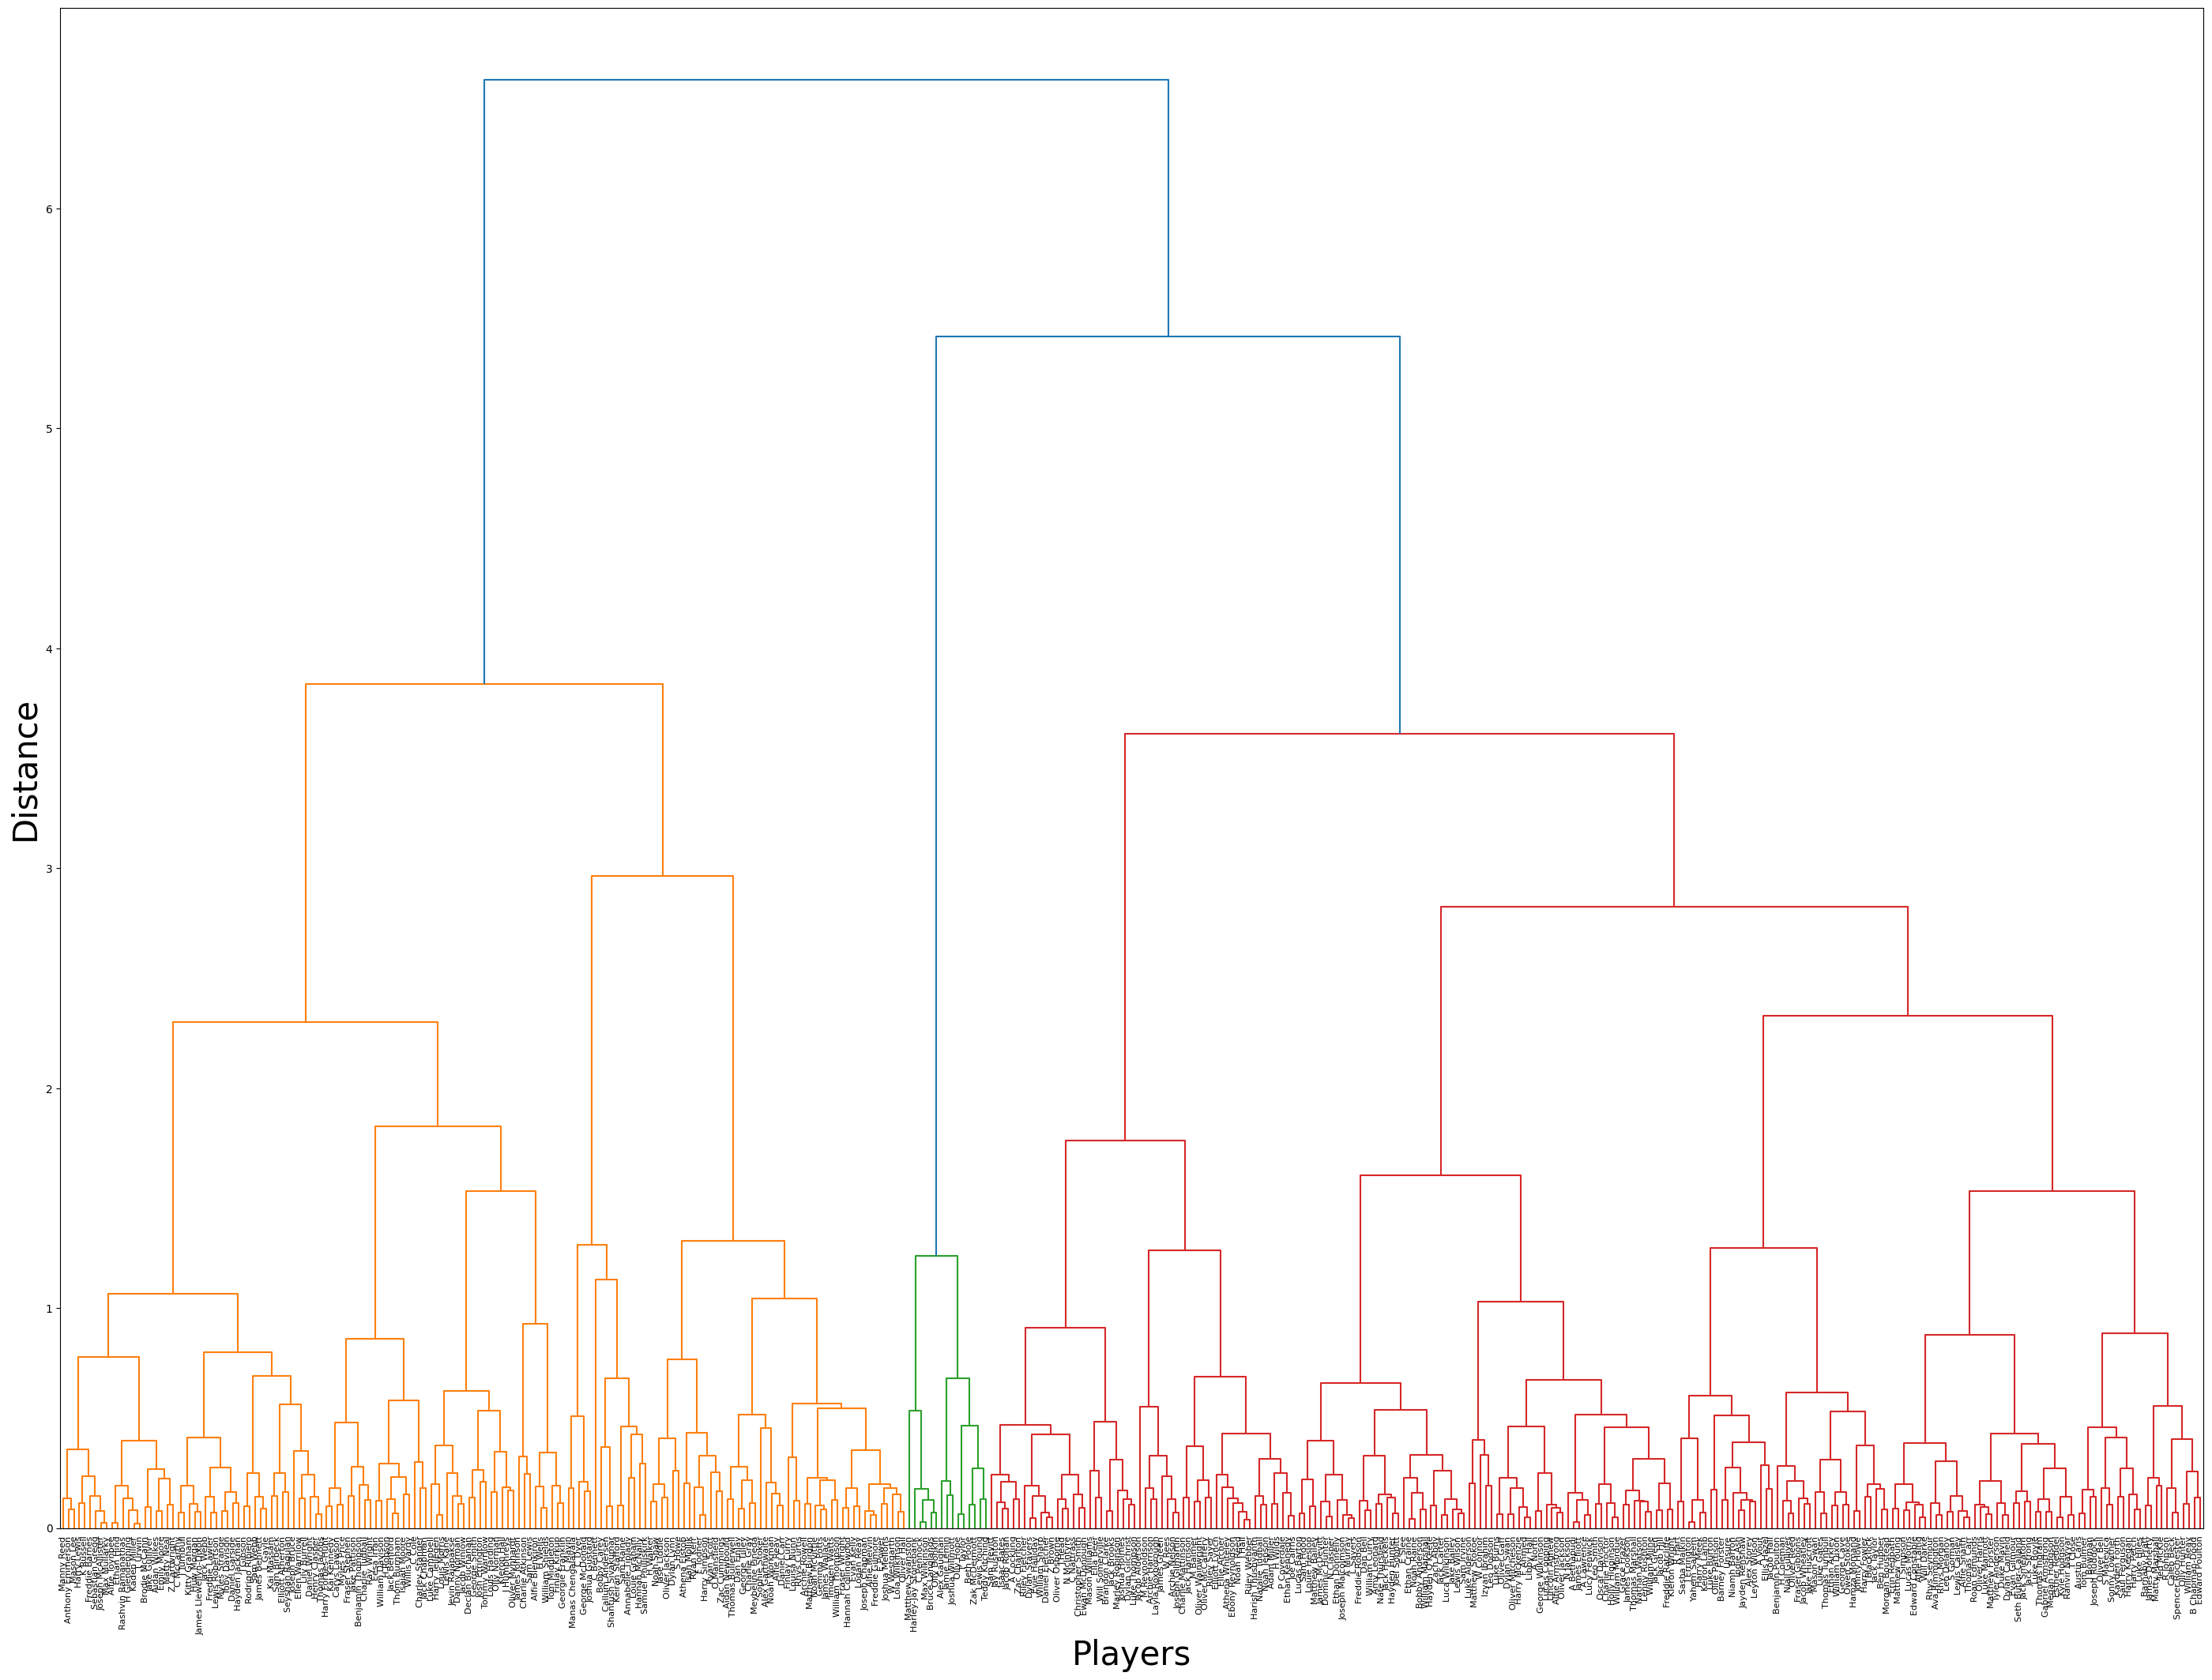

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

h_linkage = linkage(pca_df.drop('KCluster', axis=1), method='ward')

plt.figure(figsize=(35,25))
dendrogram(h_linkage, labels=df['Bowler'].values, leaf_rotation=90, leaf_font_size=8)
# plt.title('Hierarchical Clustering Dendrgram', fontsize=25)
plt.xlabel('Players', fontsize=30)
plt.ylabel('Distance', fontsize=30)
plt.show()

In [ ]:
h_labels = fcluster(h_linkage, t=4, criterion='distance')

df['Hcluster'] = h_labels
scaled_df['Hcluster'] = h_labels
pca_df['Hcluster'] = h_labels


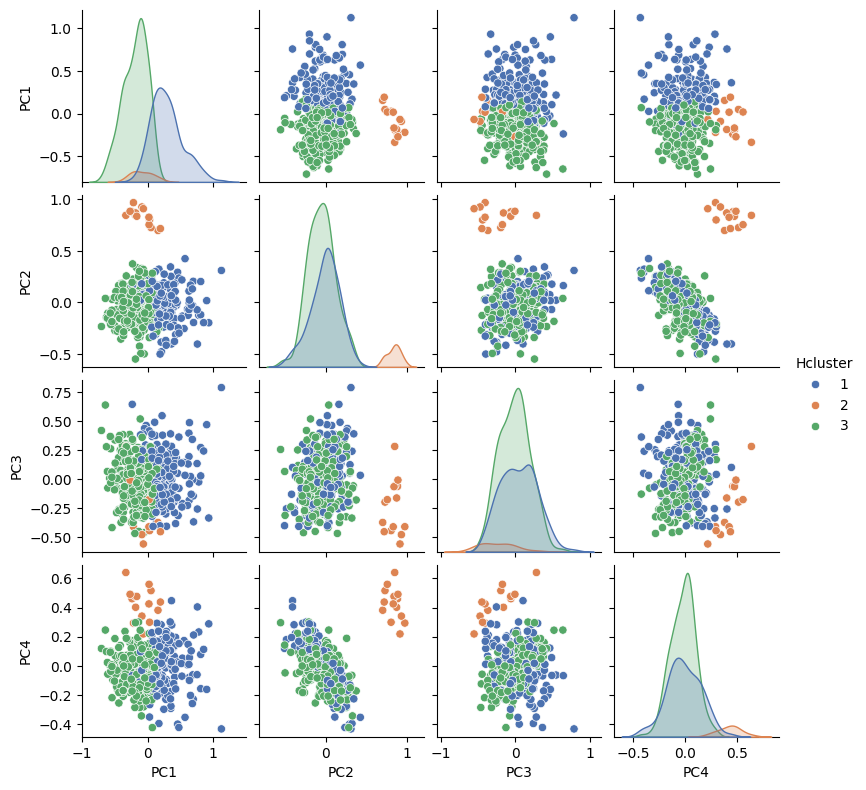

In [ ]:
sns.pairplot(pca_df.drop('KCluster', axis=1), hue='Hcluster', palette='deep', diag_kind='kde', height=2, aspect=1)
# plt.suptitle('Pairplot of Principal Components', y=1.02, fontsize=16)
plt.show()


In [ ]:
hcluster_means_summary = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').mean()
hcluster_means_summary.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Hierarchical Cluster Summary.csv')
hcluster_means_summary

,WTS,CS,ES,BBI,BWTS,SPS,MI,EI,AVMS
Hcluster,,,,,,,,,
1,0.334208,0.46858,0.443477,0.544411,0.185154,0.399698,0.419574,0.227713,0.678283
2,0.000000,0.00000,0.727483,0.412871,0.000000,0.000000,0.107816,0.341241,0.000000
3,0.181174,0.68939,0.626122,0.535249,0.017172,0.272897,0.141402,0.332987,0.713731


In [ ]:
hcluster_descriptive = scaled_df.drop('KCluster',axis=1).groupby('Hcluster').describe()
hcluster_descriptive.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Hierarchical Cluster Descriptive.csv')
hcluster_descriptive

WTS                                                              \
          count      mean       std       min       25%       50%       75%   
Hcluster                                                                      
1         154.0  0.334208  0.134003  0.055811  0.243196  0.316557  0.399859   
2          15.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3         221.0  0.181174  0.086657  0.042271  0.103590  0.178228  0.230184   

                       CS           ...        EI             AVMS            \
               max  count     mean  ...       75%       max  count      mean   
Hcluster                            ...                                        
1         1.000000  154.0  0.46858  ...  0.352183  0.660049  154.0  0.678283   
2         0.000000   15.0  0.00000  ...  0.501240  0.778151   15.0  0.000000   
3         0.449658  221.0  0.68939  ...  0.477121  1.000000  221.0  0.713731   

                                                                      
               std       min       25%       50%       75%       max  
Hcluster                                                              
1         0.092582  0.471378  0.617794  0.667760  0.728616  0.980398  
2         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3         0.103482  0.440624  0.643775  0.714576  0.784216  1.000000  

[3 rows x 72 columns]

In [ ]:
hcluster_1_data = scaled_df[h_labels==1].copy()
hcluster_1_data['Composite Score'] = (
    hcluster_1_data['BBI'] * weights['BBI'] +
    hcluster_1_data['WTS'] * weights['WTS'] +
    hcluster_1_data['CS'] * weights['CS'] +
    hcluster_1_data['EI'] * weights['EI'] +
    hcluster_1_data['MI'] * weights['MI'] +
    hcluster_1_data['BWTS'] * weights['BWTS'] +
    hcluster_1_data['SPS'] * weights['SPS'] +
    hcluster_1_data['ES'] * weights['ES'] +
    hcluster_1_data['AVMS'] * weights['AVMS']
)

hcluster_1_data['Bowler'] = df[h_labels==1]['Bowler'].values
hcluster_1_data['Team'] = df[h_labels==1]['Team'].values

ranked_hcluster = hcluster_1_data[['Bowler', 'Team', 'Composite Score']].sort_values(by='Composite Score', ascending=False)
ranked_hcluster

,Bowler,Team,Composite Score
41,C Bennett,Littletown CC Under 13,5.864507
126,Hannah McNally,Leadgate CC Under 13,4.945510
213,Keiran Stafford,Hylton CCC Under 13,4.897610
347,Sophie Stoker,Seaham Harbour CC Under 13 Purple,4.701663
25,Athena Elstob,Seaham Harbour CC Under 13 Purple,4.674263
...,...,...,...
233,Lily Burrell,Hetton Lyons CC Under 13 Gold,2.859701
201,Joseph McAllister,Hunwick CC Under 13,2.831020
342,Sebastian Gregg,"Marsden CC, Tyne & Wear Under 13",2.715709
272,Max Mullarky,Bishop Auckland CC Under 13,2.689531


In [ ]:
ranked_hcluster['Rank'] = range(1, len(ranked_hcluster) + 1)
ranked_hcluster = ranked_hcluster[['Rank', 'Bowler', 'Team', 'Composite Score']]
ranked_hcluster

,Rank,Bowler,Team,Composite Score
41,1,C Bennett,Littletown CC Under 13,5.864507
126,2,Hannah McNally,Leadgate CC Under 13,4.945510
213,3,Keiran Stafford,Hylton CCC Under 13,4.897610
347,4,Sophie Stoker,Seaham Harbour CC Under 13 Purple,4.701663
25,5,Athena Elstob,Seaham Harbour CC Under 13 Purple,4.674263
...,...,...,...,...
233,150,Lily Burrell,Hetton Lyons CC Under 13 Gold,2.859701
201,151,Joseph McAllister,Hunwick CC Under 13,2.831020
342,152,Sebastian Gregg,"Marsden CC, Tyne & Wear Under 13",2.715709
272,153,Max Mullarky,Bishop Auckland CC Under 13,2.689531


In [ ]:
ranked_hcluster.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Bowler Rankning Hierarchical (PCA).csv', index=False)

In [ ]:
df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Data with clusters.csv', index=False)
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Data with clusters (Scaled).csv', index=False)
pca_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Bowling Scorecard Analysis/Analysis (PCA)/Data with clusters (PCA).csv', index=False)